In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


In [2]:
data = pd.read_csv("RawData.csv")

Y = data['BUY']
X = data.drop('BUY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [3]:
classifier = RandomForestClassifier(n_estimators=9)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 596 1130]
 [ 224 5855]]
             precision    recall  f1-score   support

          0       0.73      0.35      0.47      1726
          1       0.84      0.96      0.90      6079

avg / total       0.81      0.83      0.80      7805

0.8265214606021781


In [4]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.10129959 0.13022552 0.11470175 0.10394499 0.10685551 0.11408956
 0.10018655 0.12356582 0.10513071]


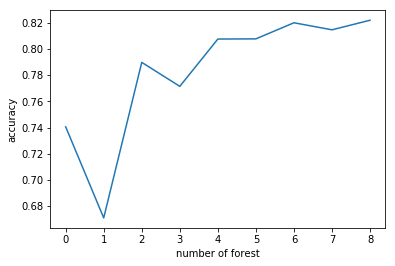

In [5]:
trees = range(9)
accuracy = np.zeros(9)


for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx + 1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy[idx] = accuracy_score(y_test,y_pred)
    
plt.cla()
plt.plot(trees, accuracy)
plt.xlabel('number of forest')
plt.ylabel('accuracy')
plt.show()